<a href="https://colab.research.google.com/github/helghand1/MAT421/blob/main/Module_B_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hussein ElGhandour
# MAT 421
# Module B: Interpolation


## Interpolation Problem Statement

### Introduction
Interpolation is a method used to estimate unknown values between given data points by constructing a function that exactly passes through the provided points. For a dataset with independent variables $x_i$ and dependent variables $y_i$ where $i=1, 2, ..., n$, the goal is to determine a function $f(x)$ such that $f(x_i) = y_i$ for all data points. Unlike regression, interpolation assumes the data points are precise and aims to construct a function that seamlessly connects them. This technique is widely applied in scenarios requiring smooth transitions, such as reconstructing data or modeling physical phenomena based on observed values.

<br>

The goal of interpolation is to estimate values between these points, as we will explore in the following sections. These are the data points that we will use to demonstrate various interpolation methods:

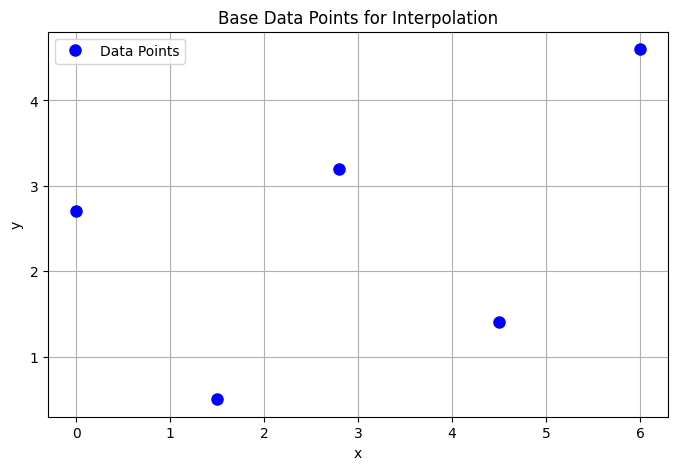

In [ ]:
import matplotlib.pyplot as plt

# Base data points
x = [0, 1.5, 2.8, 4.5, 6]
y = [2.7, 0.5, 3.2, 1.4, 4.6]

# Plot the base points
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='Data Points', markersize=8, color='blue')
plt.title('Base Data Points for Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Linear Interpolation

### Introduction:
Linear interpolation is a simple method used to estimate unknown values between two known data points. The assumption is that the value lies on a straight line connecting the nearest points greater than and less than the desired value. Given two data points, $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$, and a value $x$ such that $x_i \leq x \leq x_{i+1}$, the interpolated value $\hat{y}$ is computed using the formula:

$$
\hat{y} = y_i + \frac{(y_{i+1} - y_i)}{(x_{i+1} - x_i)} \cdot (x - x_i)
$$

Here:
- $x_i$ and $x_{i+1}$: Independent variable values (known points).
- $y_i$ and $y_{i+1}$: Dependent variable values (known points).
- $x$: The point at which interpolation is performed.
- $\hat{y}$: The interpolated value at $x$.

Linear interpolation is simple and efficient, however, it assumes a linear relationship between the data points, which may not always be accurate for non-linear data.

<br>

### Linear Interpolation Example: Manual Calculation and Visualization

In this example, we manually calculate the interpolated value at $x = 3.5$ using the formula for linear interpolation:
$$
\hat{y} = 3.2 + \frac{(1.4 - 3.2)}{(4.5 - 2.8)} \cdot (3.5 - 2.8) = 2.46
$$
The data points are:
- $x = [0, 1.5, 2.8, 4.5, 6]$
- $y = [2.7, 0.5, 3.2, 1.4, 4.6]$

We identify the two nearest points for $x = 3.5$, which are $(2.8, 3.2)$ and $(4.5, 1.4)$. Using the formula, we compute the interpolated value $\hat{y}$. Finally, we visualize the data points, the interpolation line, and confirm that the interpolated point lies on the line between its nearest neighbors.


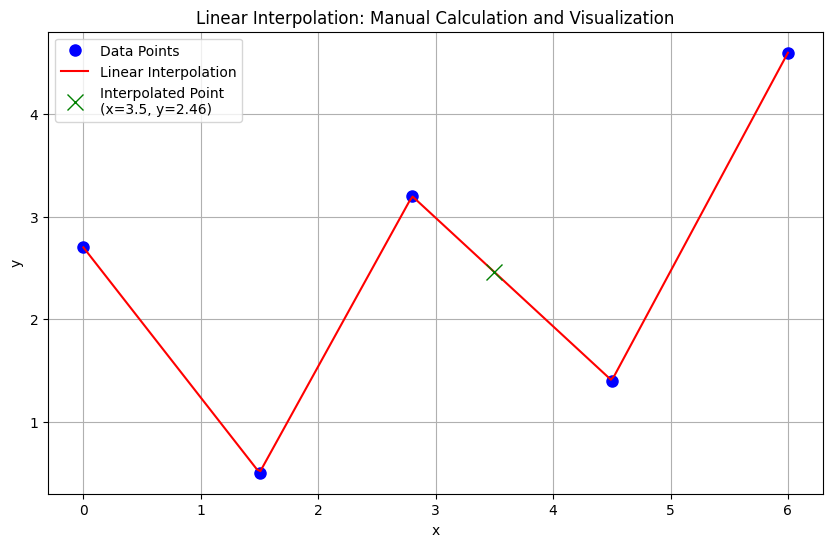


The interpolated value at x = 3.5 is approximately y = 2.46


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the data points
x = [0, 1.5, 2.8, 4.5, 6]
y = [2.7, 0.5, 3.2, 1.4, 4.6]

# Manually calculate the interpolated value at x = 3.5
x_target = 3.5
x1, x2 = 2.8, 4.5  # Nearest points
y1, y2 = 3.2, 1.4  # Corresponding y-values
y_target = y1 + ((y2 - y1) / (x2 - x1)) * (x_target - x1)

# Create a linear interpolation function using scipy
linear_interp = interp1d(x, y, kind='linear')

# Define new x values for interpolation
x_new = np.linspace(min(x), max(x), 200)
y_new = linear_interp(x_new)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points', markersize=8, color='blue')  # Data points
plt.plot(x_new, y_new, '-', label='Linear Interpolation', color='red')  # Linear interpolation line
plt.plot(x_target, y_target, 'x', label=f'Interpolated Point\n(x={x_target}, y={y_target:.2f})', markersize=12, color='green')  # Interpolated point
plt.title('Linear Interpolation: Manual Calculation and Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the interpolated value
print(f"\nThe interpolated value at x = {x_target} is approximately y = {y_target:.2f}")

## Cubic Spline Interpolation

Cubic spline interpolation is a powerful method used to fit a smooth curve through a set of data points by constructing piecewise cubic polynomials. Each polynomial spans between two consecutive data points, ensuring that the curve is not only continuous but also has continuous first and second derivatives. This smoothness makes cubic splines particularly effective for capturing non-linear patterns in data.

To determine the coefficients of the cubic polynomials, certain boundary conditions must be applied. In this example, a natural spline is used, which assumes the second derivatives at the endpoints are zero, ensuring the curve flattens out smoothly at the boundaries. Compared to linear interpolation, cubic spline interpolation produces a more accurate and visually appealing representation, especially when the underlying data exhibits curvature.

Below is a demonstration of how to construct and visualize a cubic spline interpolation using Python's "CubicSpline" function from SciPy. The resulting curve smoothly passes through the given data points, highlighting the advantage of this method over simpler interpolation techniques.


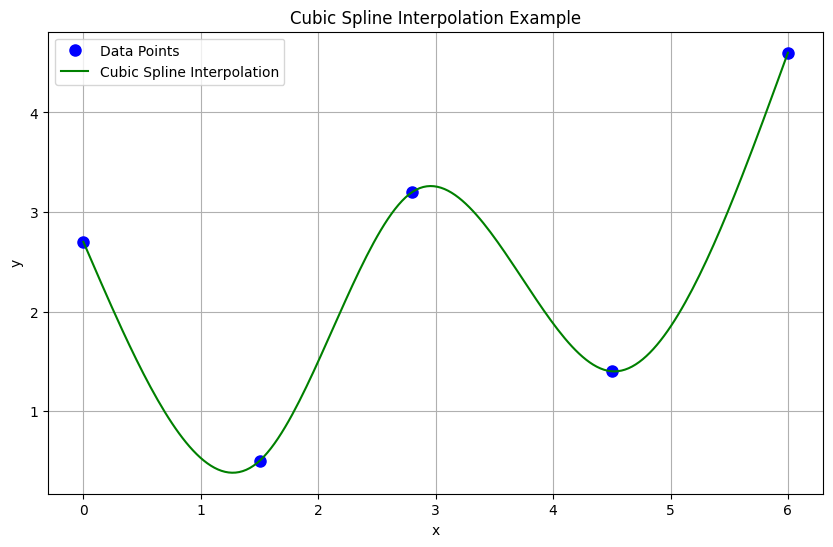

In [1]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
x = [0, 1.5, 2.8, 4.5, 6]
y = [2.7, 0.5, 3.2, 1.4, 4.6]

# Create the cubic spline interpolation function
cubic_spline = CubicSpline(x, y, bc_type='natural')  # Natural spline

# Generate interpolated values
x_new = np.linspace(min(x), max(x), 200)
y_new = cubic_spline(x_new)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points', markersize=8, color='blue')  # Data points
plt.plot(x_new, y_new, '-', label='Cubic Spline Interpolation', color='green')  # Spline curve
plt.title('Cubic Spline Interpolation Example')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
